In [1]:
# ==========================================
# PHASE 4: MODELING AND CLASSIFICATION
# ==========================================

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import joblib  # for saving trained models

# 🎯 Set visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:
# 📂 Load the cleaned soil dataset
df = pd.read_csv("../data/clean/soil_data_final.csv")
print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()


✅ Dataset loaded successfully!
(620, 5)


,N,P,K,pH,EC
0,131,61,181,7.1,0.11
1,171,21,250,4.9,2.09
2,161,57,186,5.8,0.93
3,160,52,66,6.2,0.17
4,137,74,188,6.1,0.57


In [4]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA (keep 2 components for clustering)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

print("✅ PCA completed. Shape:", pca_df.shape)
pca_df.head()



✅ PCA completed. Shape: (620, 2)


,PC1,PC2
0,-0.245307,1.387776
1,0.779907,-0.943094
2,0.249449,0.281245
3,-1.395669,0.608824
4,0.459239,0.386107


In [5]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA (keep 2 components for clustering)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

print("✅ PCA completed. Shape:", pca_df.shape)
pca_df.head()


✅ PCA completed. Shape: (620, 2)


,PC1,PC2
0,-0.245307,1.387776
1,0.779907,-0.943094
2,0.249449,0.281245
3,-1.395669,0.608824
4,0.459239,0.386107


In [6]:
# ==========================================
# Step 4: K-Means Clustering on PCA Features
# ==========================================

# Try 3 clusters first (you can tune this)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans.fit_predict(pca_df)

# Add cluster labels back to original scaled data
df_clustered = df.copy()
df_clustered["Cluster"] = pca_df["Cluster"]

print("✅ KMeans clustering completed!")
print(df_clustered["Cluster"].value_counts())

# Save clustered data
df_clustered.to_csv("../data/clean/soil_data_clustered.csv", index=False)
print("💾 Clustered dataset saved to ../data/clean/soil_data_clustered.csv")


✅ KMeans clustering completed!
Cluster
0    264
1    183
2    173
Name: count, dtype: int64
💾 Clustered dataset saved to ../data/clean/soil_data_clustered.csv


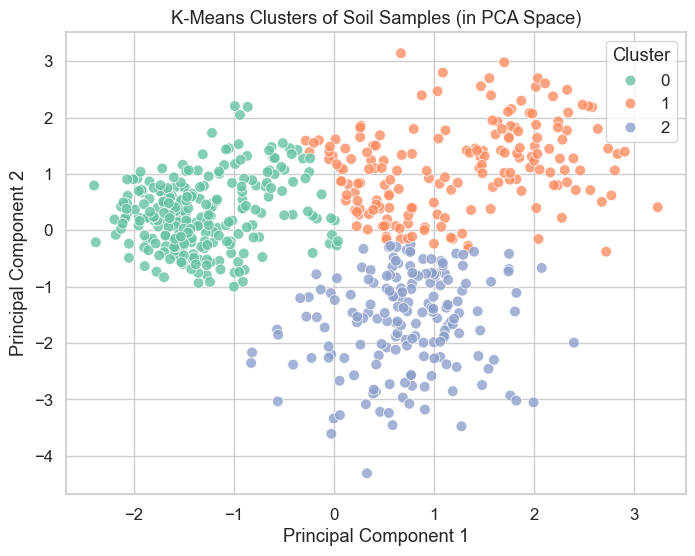

In [7]:
# ==========================================
# Step 5: Visualize Clusters in PCA Space
# ==========================================

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1", 
    y="PC2", 
    hue="Cluster", 
    data=pca_df, 
    palette="Set2", 
    s=60, 
    alpha=0.8
)

plt.title("K-Means Clusters of Soil Samples (in PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [9]:
# ==========================================
# Step 6: Train-Test Split and Model Training
# ==========================================

# Features and target
X = df.values      # original standardized features
y = df_clustered["Cluster"].values  # cluster labels as target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data split into training and testing sets:")
print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# ------------------------------------------
# 🎯 Random Forest Classifier
# ------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌳 Random Forest Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ------------------------------------------
# ⚙️ Support Vector Machine Classifier
# ------------------------------------------
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n⚙️ SVM Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


✅ Data split into training and testing sets:
Train samples: 496
Test samples: 124

🌳 Random Forest Results:
Accuracy: 0.927

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.87      0.89      0.88        37
           2       0.94      0.94      0.94        34

    accuracy                           0.93       124
   macro avg       0.92      0.93      0.92       124
weighted avg       0.93      0.93      0.93       124


⚙️ SVM Results:
Accuracy: 0.839

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        53
           1       0.82      0.86      0.84        37
           2       0.81      0.65      0.72        34

    accuracy                           0.84       124
   macro avg       0.83      0.82      0.82       124
weighted avg       0.84      0.84      0.83       124



/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_62497/3388820271.py:25: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_62497/3388820271.py:25: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9881 (\N{GEAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aarush/projects/soil

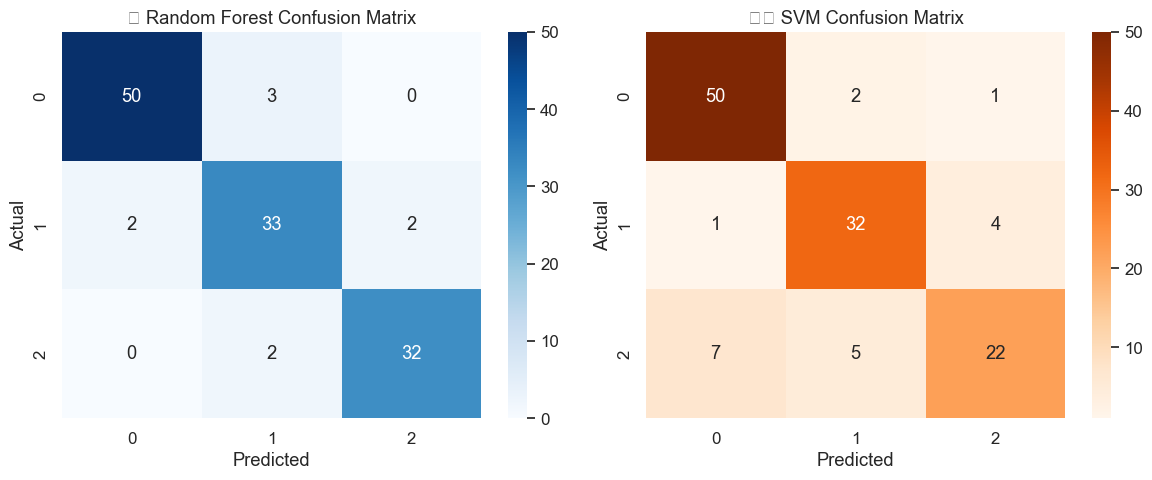

/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


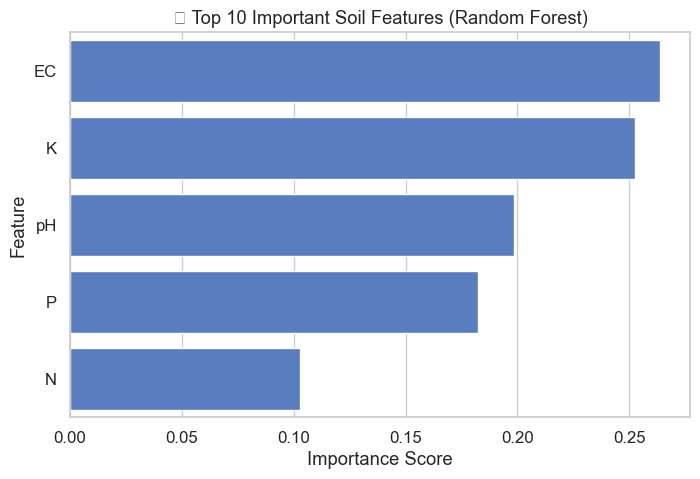

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------------------------------------
# Confusion Matrices
# -------------------------------------
rf_cm = confusion_matrix(y_test, y_pred_rf)
svm_cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("🌳 Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Oranges")
plt.title("⚙️ SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# -------------------------------------
# Feature Importance (Random Forest)
# -------------------------------------
import numpy as np

feature_importances = pd.Series(rf.feature_importances_, index=df.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("🌾 Top 10 Important Soil Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [11]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 🌳 Random Forest
# -----------------------------
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("🌳 Random Forest Results:")
print(f"Accuracy: {rf_acc:.3f}")
print(f"Training + Prediction Time: {rf_time:.4f} seconds")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# -----------------------------
# ⚙️ SVM
# -----------------------------
start = time.time()
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
svm_time = time.time() - start

y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

print("\n⚙️ SVM Results:")
print(f"Accuracy: {svm_acc:.3f}")
print(f"Training + Prediction Time: {svm_time:.4f} seconds")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


🌳 Random Forest Results:
Accuracy: 0.927
Training + Prediction Time: 0.1207 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.87      0.89      0.88        37
           2       0.94      0.94      0.94        34

    accuracy                           0.93       124
   macro avg       0.92      0.93      0.92       124
weighted avg       0.93      0.93      0.93       124


⚙️ SVM Results:
Accuracy: 0.839
Training + Prediction Time: 0.0085 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        53
           1       0.82      0.86      0.84        37
           2       0.81      0.65      0.72        34

    accuracy                           0.84       124
   macro avg       0.83      0.82      0.82       124
weighted avg       0.84      0.84      0.83       124



In [9]:
# ==========================================
# Recreate Train/Test Split
# ==========================================
from sklearn.model_selection import train_test_split

# Load the clustered dataset
df_clustered = pd.read_csv("../data/clean/soil_data_clustered.csv")

# Separate features and target
X = df_clustered.drop("Cluster", axis=1)
y = df_clustered["Cluster"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split done!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Data split done!
Train shape: (496, 5)
Test shape: (124, 5)


In [10]:
# ==========================================
# Decision Tree Classifier
# ==========================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Train
start = time.time()
dt.fit(X_train, y_train)
train_time = time.time() - start

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"🌳 Decision Tree Accuracy: {dt_acc:.3f}")
print(f"🕒 Training Time: {train_time:.3f} sec")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🌳 Decision Tree Accuracy: 0.911
🕒 Training Time: 0.023 sec

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.91      0.86      0.89        37
           2       0.86      0.91      0.89        34

    accuracy                           0.91       124
   macro avg       0.91      0.91      0.91       124
weighted avg       0.91      0.91      0.91       124



In [12]:
# ==========================================
# Logistic Regression (Updated)
# ==========================================
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import time

# Scale the features (Logistic Regression benefits from normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model with more iterations to ensure convergence
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Train
start = time.time()
log_reg.fit(X_train_scaled, y_train)
train_time = time.time() - start

# Predict
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"🚀 Logistic Regression Accuracy: {lr_acc:.3f}")
print(f"🕒 Training Time: {train_time:.3f} sec")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


🚀 Logistic Regression Accuracy: 0.976
🕒 Training Time: 0.034 sec

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.97      0.95      0.96        37
           2       0.94      1.00      0.97        34

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.97       124
weighted avg       0.98      0.98      0.98       124



In [13]:
# ==========================================
# K-Nearest Neighbors (KNN)
# ==========================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# KNN also works best with scaled data
knn = KNeighborsClassifier(n_neighbors=5)

# Train
start = time.time()
knn.fit(X_train_scaled, y_train)
train_time = time.time() - start

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"🤖 KNN Accuracy: {knn_acc:.3f}")
print(f"🕒 Training Time: {train_time:.3f} sec")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


🤖 KNN Accuracy: 0.952
🕒 Training Time: 0.013 sec

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.94      0.89      0.92        37
           2       0.92      1.00      0.96        34

    accuracy                           0.95       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.95      0.95      0.95       124



In [14]:
# ==========================================
# Gradient Boosting Classifier
# ==========================================
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize model
gb = GradientBoostingClassifier(random_state=42)

# Train
start = time.time()
gb.fit(X_train, y_train)
train_time = time.time() - start

# Predict
y_pred_gb = gb.predict(X_test)

# Evaluate
gb_acc = accuracy_score(y_test, y_pred_gb)
print(f"🌲💡 Gradient Boosting Accuracy: {gb_acc:.3f}")
print(f"🕒 Training Time: {train_time:.3f} sec")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


🌲💡 Gradient Boosting Accuracy: 0.927
🕒 Training Time: 0.196 sec

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.87      0.89      0.88        37
           2       0.94      0.94      0.94        34

    accuracy                           0.93       124
   macro avg       0.92      0.93      0.92       124
weighted avg       0.93      0.93      0.93       124



In [15]:
# ==========================================
# XGBoost Classifier
# ==========================================
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize model
xgb = XGBClassifier(
    eval_metric='mlogloss', 
    use_label_encoder=False, 
    random_state=42
)

# Train
start = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"⚡ XGBoost Accuracy: {xgb_acc:.3f}")
print(f"🕒 Training Time: {train_time:.3f} sec")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


⚡ XGBoost Accuracy: 0.927
🕒 Training Time: 0.284 sec

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.89      0.86      0.88        37
           2       0.92      0.97      0.94        34

    accuracy                           0.93       124
   macro avg       0.92      0.93      0.92       124
weighted avg       0.93      0.93      0.93       124



/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [19:09:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
# ==========================================
# Naive Bayes Classifier
# ==========================================
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize model
nb = GaussianNB()

# Train
start = time.time()
nb.fit(X_train, y_train)
train_time = time.time() - start

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluate
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f"🧱 Naive Bayes Accuracy: {nb_acc:.3f}")
print(f"🕒 Training Time: {train_time:.3f} sec")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


🧱 Naive Bayes Accuracy: 0.968
🕒 Training Time: 0.014 sec

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.97      0.92      0.94        37
           2       0.97      0.97      0.97        34

    accuracy                           0.97       124
   macro avg       0.97      0.96      0.97       124
weighted avg       0.97      0.97      0.97       124



,Model,Accuracy,Train Time (s)
3,Logistic Regression,0.976,0.034
7,Naive Bayes,0.968,0.014
4,KNN,0.952,0.013
1,Random Forest,0.927,0.120
5,Gradient Boosting,0.927,0.196
6,XGBoost,0.927,0.284
0,Decision Tree,0.911,0.023
2,SVM,0.839,0.090


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_2824/2851335324.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


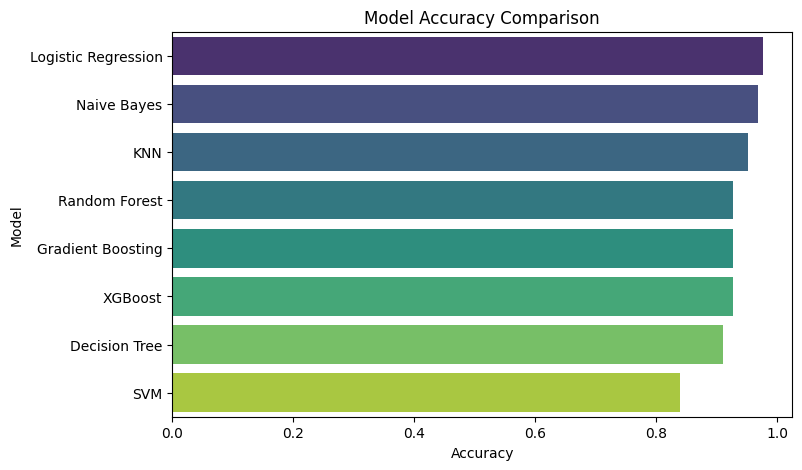

/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_2824/2851335324.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Train Time (s)", y="Model", data=results_df, palette="magma")


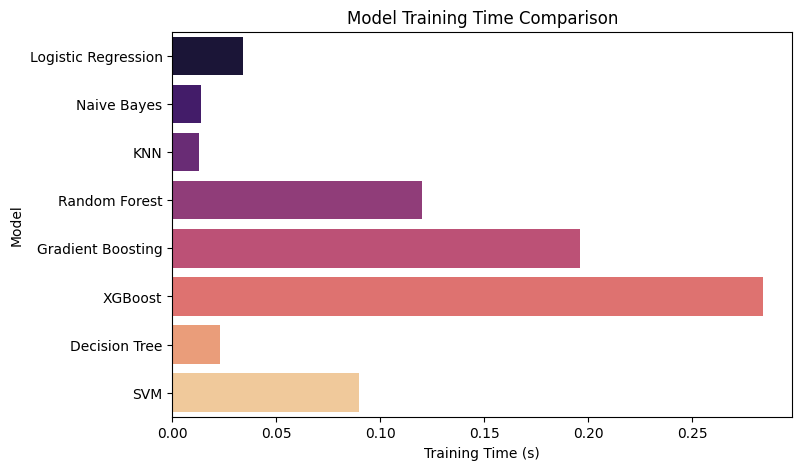

In [17]:
# ==========================================
# Model Performance Summary
# ==========================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine results manually
results = [
    {"Model": "Decision Tree", "Accuracy": 0.911, "Train Time (s)": 0.023},
    {"Model": "Random Forest", "Accuracy": 0.927, "Train Time (s)": 0.120},
    {"Model": "SVM", "Accuracy": 0.839, "Train Time (s)": 0.090},
    {"Model": "Logistic Regression", "Accuracy": 0.976, "Train Time (s)": 0.034},
    {"Model": "KNN", "Accuracy": 0.952, "Train Time (s)": 0.013},
    {"Model": "Gradient Boosting", "Accuracy": 0.927, "Train Time (s)": 0.196},
    {"Model": "XGBoost", "Accuracy": 0.927, "Train Time (s)": 0.284},
    {"Model": "Naive Bayes", "Accuracy": 0.968, "Train Time (s)": 0.014}
]

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(results_df)

# Plot: Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# Plot: Training Time Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Train Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Model Training Time Comparison")
plt.xlabel("Training Time (s)")
plt.ylabel("Model")
plt.show()


In [8]:
import pandas as pd

# Correct path (no leading dot)
df = pd.read_csv("../data/clean/soil_data_final.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))

# Optional: Peek at data
display(df.head())

# Check if region/season info is available
if 'Region' in df.columns:
    print("\n🌍 Region column detected — unique values:", df['Region'].unique())

if 'Season' in df.columns:
    print("\n☀️ Season column detected — unique values:", df['Season'].unique())


✅ Dataset loaded successfully!
Shape: (620, 5)
Columns: ['N', 'P', 'K', 'pH', 'EC']


,N,P,K,pH,EC
0,131,61,181,7.1,0.11
1,171,21,250,4.9,2.09
2,161,57,186,5.8,0.93
3,160,52,66,6.2,0.17
4,137,74,188,6.1,0.57


In [9]:
df_raw = pd.read_csv("../data/raw/dataset.csv")
print(df_raw.columns)


Index(['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label'], dtype='object')
